In [79]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ;  sns.set_theme()


In [80]:
#loading
file_path="C:/Users/pelin/Downloads/heart.csv"
heart_dataset = pd.read_csv(file_path)
df=heart_dataset.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
#column , row
df.shape

(303, 14)

In [82]:
#There is no null values
df.isnull().values.any() 

False

In [83]:
#There is no na values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

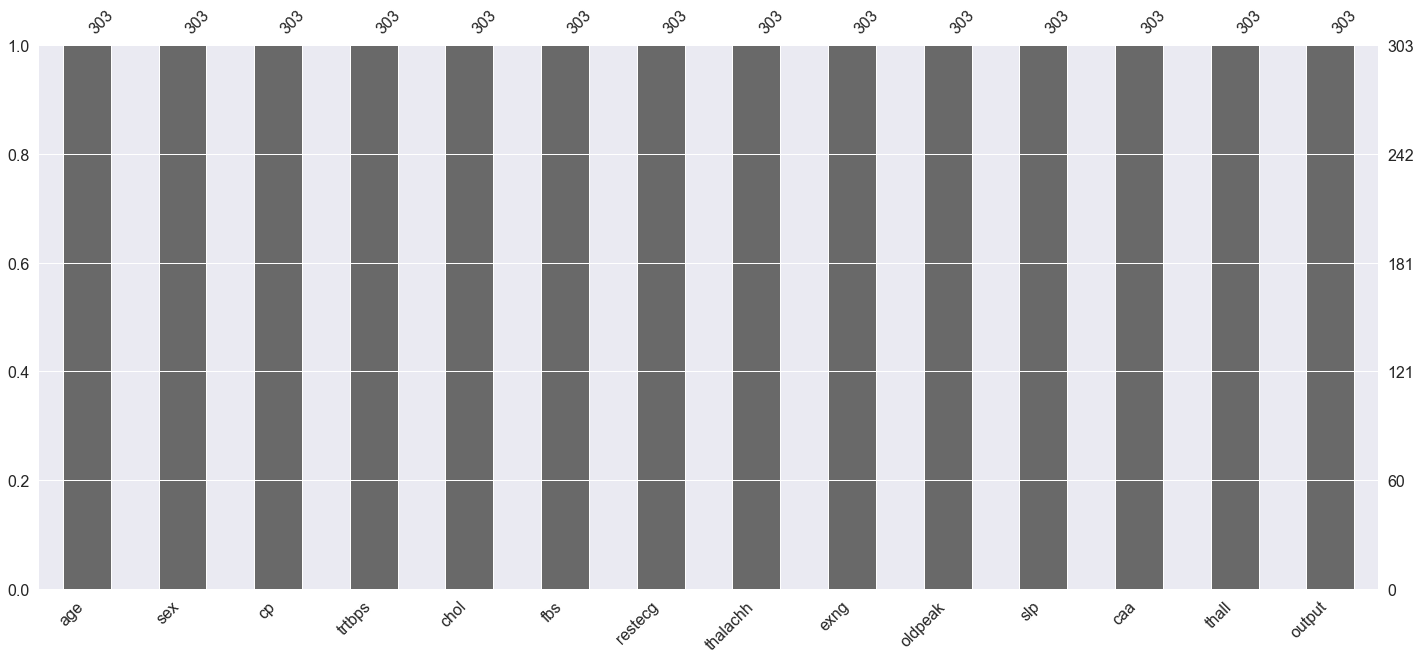

In [84]:
#Using Missingno
import missingno as msno
msno.bar(df)

In [85]:
heart_dataset_without_output = heart_dataset.drop("output", axis = 1)
heart_dataset_without_output.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<AxesSubplot:>

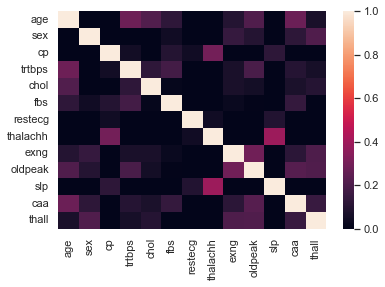

In [86]:
corr_df=heart_dataset_without_output.corr()
sns.heatmap(corr_df,vmin=0, vmax=1)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
X = df[["age"]]
y = df["output"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_


1.2177309987821667

In [89]:
model.coef_

array([-0.01238223])

In [90]:
model.score(X,y) #R^2 value

0.05082261461529558

In [91]:
model.predict(X)[0:10]

array([0.43765044, 0.75958845, 0.71005952, 0.52432606, 0.51194383,
       0.51194383, 0.52432606, 0.67291283, 0.57385498, 0.51194383])

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [93]:
X = heart_dataset_without_output
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [94]:
training = df.copy()
print("Training shape ",training.shape)
print("X train ",X_train.shape)
print("y train ",y_train.shape)
print("X test ",X_test.shape)
print("y test ",y_test.shape)



Training shape  (303, 14)
X train  (242, 13)
y train  (242,)
X test  (61, 13)
y test  (61,)


In [95]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

0.8941451184387583
[-0.00062752 -0.1935466   0.10288355 -0.00208192 -0.00024992  0.02845524
  0.05171915  0.00230438 -0.1696945  -0.06264225  0.1057503  -0.10996777
 -0.1255391 ]


In [96]:
new_data=[[58],[0],[2],[120],[340],[0],[1],[172],[0],[0],[2],[0],[2]]
new_data=pd.DataFrame(new_data).T

In [97]:
model.predict(new_data)

array([1.13720537])

In [100]:
##Training Error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [101]:
rmse

0.3490727909328331

In [102]:
##Training Error
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

In [103]:
rmse

0.3409849262486543

In [104]:
#Model Tuning
#Using cross_validation
cross_val_score(model,X_train,y_train,cv=10,scoring="r2").mean()

0.39786421153029555

In [109]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")).mean()

0.37173782063815275

In [108]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

0.4153282162448522